In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
wsm_2025 = pd.read_csv("data/WSM_Database_2025.csv", low_memory=False)  # Adjust filename accordingly

#select the EU area
wsm_EU = wsm_2025[
    (wsm_2025["LON"] >= -15) & (wsm_2025["LON"] <= 43) &
    (wsm_2025["LAT"] >= 28) & (wsm_2025["LAT"] <= 62)
].copy()

wsm_EU.to_csv("data/anchors_train/WSM2025_EU.csv", index=False)



In [5]:
wsm_EU

,ID,ISC_ID,SITE,LAT,LON,AZI,TYPE,DEPTH,QUALITY,REGIME,...,CRUST,REF1,REF2,REF3,REF4,REF5,REF6,COMMENT,PLATE,DIST
0,wsm00015,NaN,TU42,36.880,30.670,0,OC,0.31,C,U,...,True,CAKIXX1971,NaN,NaN,NaN,NaN,NaN,FRSDB,AT,170.0
1,wsm00016,NaN,TU41,40.180,29.100,0,OC,0.17,B,NF,...,True,KOSEXX1983,NaN,NaN,NaN,NaN,NaN,FRSDB,AT,57.0
2,wsm00017,NaN,TU40,41.800,33.690,0,OC,0.16,C,NF,...,True,PASAET1984,NaN,NaN,NaN,NaN,NaN,FRSDB,EU,87.0
3,wsm00025,NaN,SW235,56.821,12.714,17,HF,0.15,B,TF,...,True,BJARKL1989,NaN,NaN,NaN,NaN,NaN,Amphibolite and Gneiss - FRSDB,EU,1783.0
4,wsm00026,NaN,SW234,57.428,16.685,140,HF,0.50,B,TS,...,True,BJARKL1989,NaN,NaN,NaN,NaN,NaN,FRSDB,EU,1782.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,wsm98551,7952434.0,NaN,39.480,40.750,142,FMS,20.30,C,SS,...,True,ISCXXX,NaN,NaN,NaN,NaN,NaN,NaN,EU,28.0
100300,wsm98700,7997293.0,NaN,38.830,27.800,129,FMS,12.90,C,SS,...,True,ISCXXX,NaN,NaN,NaN,NaN,NaN,NaN,AT,38.0
100641,wsm99541,10607418.0,NaN,36.620,5.320,138,FMS,12.00,C,SS,...,True,ISCXXX,NaN,NaN,NaN,NaN,NaN,NaN,AF,54.0
100650,wsm99556,10608402.0,NaN,43.990,20.120,59,FMS,13.50,C,SS,...,True,ISCXXX,NaN,NaN,NaN,NaN,NaN,NaN,EU,555.0


In [3]:
# list(wsm_EU.columns) #= ['ID', 'LAT', 'LON', 'AZI', 'QUALITY', 'REGIME', 'PLATE', 'DIST']

In [16]:
grid_df = pd.read_csv("data/grids_train/all_grid_data_0p2r.csv")

df_30, df_70 = train_test_split(
    grid_df,
    test_size=0.70,
    random_state=42,  # you can change this
    shuffle=True
)
# Save
df_30.to_csv("data/grids_train/grid_data_30p_0p2r.csv", index=False)
df_70.to_csv("data/grids_train/grid_data_70p_0p2r.csv", index=False)

print(f"30% south: {len(df_30)} rows, 70% north: {len(df_70)} rows")


30% south: 241 rows, 70% north: 565 rows


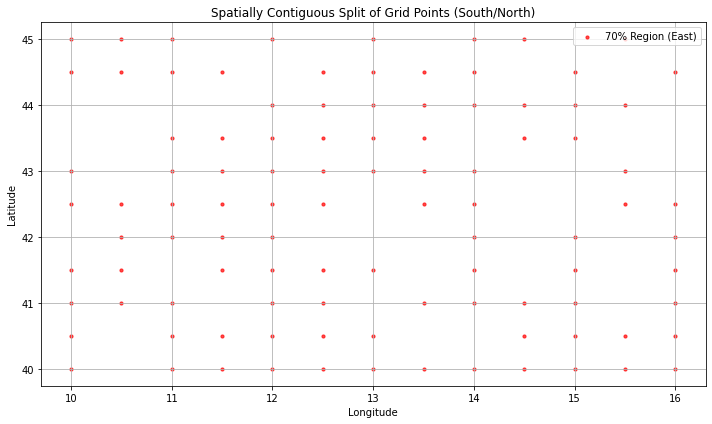

In [15]:

# Plot the two spatially contiguous regions
plt.figure(figsize=(10, 6))

# 30% (south) in blue
# plt.scatter(df_30['LON'], df_30['LAT'], color='blue', label='30% Region (West)', s=10, alpha=0.7)

# 70% (north) in red
plt.scatter(df_70['LON'], df_70['LAT'], color='red', label='70% Region (East)', s=10, alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatially Contiguous Split of Grid Points (South/North)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
ls 

WSM2025_EU.csv*            grid_east_30.csv*   grid_west_70.csv*
WSM_Database_2025.csv*     grid_north_70.csv*  training/
bk_WSM_Database_2025.csv*  grid_south_30.csv*


In [13]:
df1 = pd.read_csv("data/grids_train/all_grid_data_0p5r.csv")

# Sort by latitude (south to north)
df_sorted = df1.sort_values(by="LON").reset_index(drop=True)
split_idx = int(len(df_sorted) * 0.30) # I take 50 percent

df_30 = df_sorted.iloc[:split_idx].copy()

df_70 = df_sorted.iloc[split_idx:].copy()

# Save
df_30.to_csv("data/grids_train/grid_data_30_east_0p5r.csv", index=False)
df_70.to_csv("data/grids_train/grid_data_70_west_0p5r.csv", index=False)

print(f"Spatial split complete. Split at LAT ≈ {df_sorted.iloc[split_idx]['LAT']:.2f}")
print(f"30% south: {len(df_30)} rows, 70% north: {len(df_70)} rows")


Spatial split complete. Split at LAT ≈ 44.50
30% south: 42 rows, 70% north: 101 rows


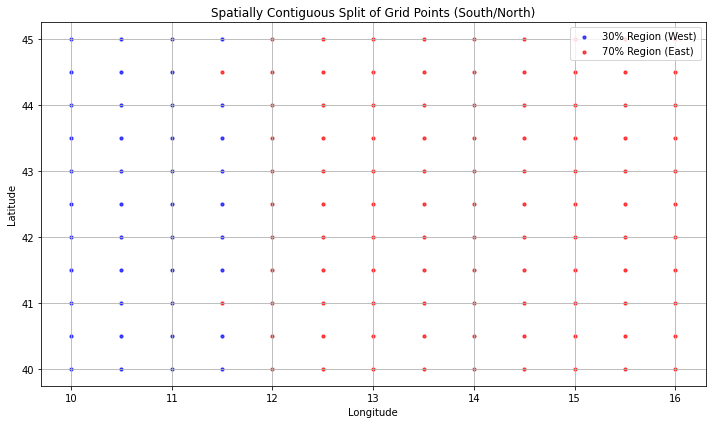

In [15]:

# Plot the two spatially contiguous regions
plt.figure(figsize=(10, 6))

# 30% (south) in blue
plt.scatter(df_30['LON'], df_30['LAT'], color='blue', label='30% Region (West)', s=10, alpha=0.7)

# 70% (north) in red
plt.scatter(df_70['LON'], df_70['LAT'], color='red', label='70% Region (East)', s=10, alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatially Contiguous Split of Grid Points (South/North)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
df2 = pd.read_csv("data/grids_train/all_grid_data_1p0r.csv")

# Sort by latitude (south to north)
df_sorted = df2.sort_values(by="LON").reset_index(drop=True)
split_idx = int(len(df_sorted) * 0.30) # I take 50 percent
df_30 = df_sorted.iloc[:split_idx].copy()
df_70 = df_sorted.iloc[split_idx:].copy()

# Save
df_30.to_csv("data/grids_train/grid_data_30_east_1p0r.csv", index=False)
df_70.to_csv("data/grids_train/grid_data_70_west_1p0r.csv", index=False)

print(f"Spatial split complete. Split at LAT ≈ {df_sorted.iloc[split_idx]['LAT']:.2f}")
print(f"30% south: {len(df_30)} rows, 70% north: {len(df_70)} rows")


Spatial split complete. Split at LAT ≈ 47.50
30% south: 304 rows, 70% north: 712 rows


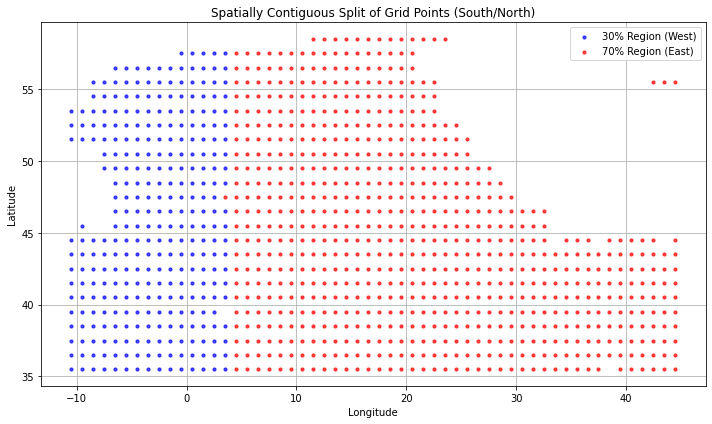

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df_30['LON'], df_30['LAT'], color='blue', label='30% Region (West)', s=10, alpha=0.7)
plt.scatter(df_70['LON'], df_70['LAT'], color='red', label='70% Region (East)', s=10, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatially Contiguous Split of Grid Points (South/North)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
df3 = pd.read_csv("data/grids_train/all_grid_data_1p5r.csv")

df_sorted = df3.sort_values(by="LON").reset_index(drop=True)
split_idx = int(len(df_sorted) * 0.30) # I take 50 percent
df_30 = df_sorted.iloc[:split_idx].copy()
df_70 = df_sorted.iloc[split_idx:].copy()

# Save
df_30.to_csv("data/grids_train/grid_data_30_east_1p5r.csv", index=False)
df_70.to_csv("data/grids_train/grid_data_70_west_1p5r.csv", index=False)

print(f"Spatial split complete. Split at LAT ≈ {df_sorted.iloc[split_idx]['LAT']:.2f}")
print(f"30% south: {len(df_30)} rows, 70% north: {len(df_70)} rows")


Spatial split complete. Split at LAT ≈ 56.50
30% south: 138 rows, 70% north: 323 rows


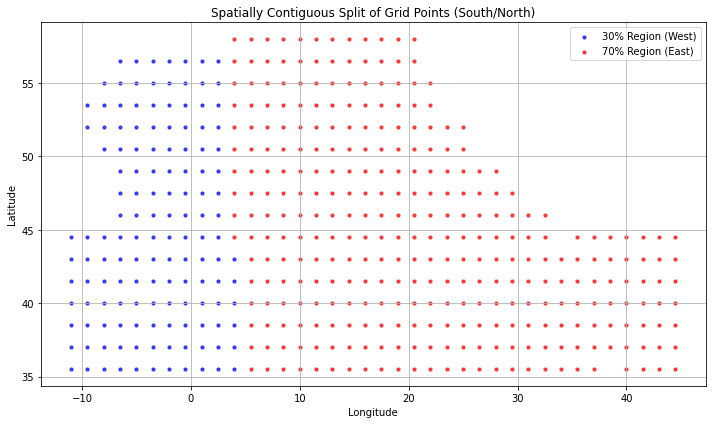

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df_30['LON'], df_30['LAT'], color='blue', label='30% Region (West)', s=10, alpha=0.7)
plt.scatter(df_70['LON'], df_70['LAT'], color='red', label='70% Region (East)', s=10, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatially Contiguous Split of Grid Points (South/North)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
